In [1]:
from typing import List
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
from pathlib import Path
import os
from typing import List

# Baseline plots

In [1]:
folder_names = ["gcn_baseline", "mlp_baseline", "gatedGCN_baseline"]
suffix = "_pos"
labels = ["GCN", "MLP", "GatedGCN"]
title = "Baseline Results"

In [ ]:
folder_names = ["gcn_baseline", "mlp_baseline", "gatedGCN_baseline"]
suffix = "_topk"
labels = ["GCN", "MLP", "GatedGCN"]
title = "Topk Pooling Results"

In [141]:

folder_names = ["gcn_baseline", "mlp_baseline"]
suffix = ""
labels = ["GCN", "MLP"]
title = "Baseline Results"

In [ ]:
folder_names = ["gcn_baseline", "mlp_baseline"]
suffix = "_topk"
labels = ["GCN", "MLP"]
title = "Topk Pooling Results"

In [5]:

folder_names = ["gcn_baseline", "mlp_baseline", "tag_baseline_pos"]
suffix = ""
labels = ["GCN", "MLP", "TAG"]
title = "Baseline Results"

In [6]:
def plot_base_perf(folder_names:List[str], labels:List[str], suffix:str="", title:str="Baseline"):
    plt.figure()
    pred_train_mean_lst = []
    pred_train_std_lst = []
    true_train_mean_lst = []

    pred_test_mean_lst = []
    pred_test_std_lst = []
    true_test_mean_lst = []
    for algo in folder_names:
        fig_dir_path = f"./Figures/{algo}{suffix}/"

        pred_train_mean_lst.append(np.load(fig_dir_path + "train_pred.npy"))
        pred_train_std_lst.append(np.load(fig_dir_path + "train_std.npy") )
        true_train_mean_lst.append(np.load(fig_dir_path + "train_true.npy"))

        pred_test_mean_lst.append(np.load(fig_dir_path + "test_pred.npy"))
        pred_test_std_lst.append(np.load(fig_dir_path + "test_std.npy"))
        true_test_mean_lst.append(np.load(fig_dir_path + "test_true.npy"))
        
    #We plot the results on the testing dataset
    for i in range(len(folder_names)):
        plt.errorbar(true_train_mean_lst[i] + 0.05*i, pred_train_mean_lst[i]/true_train_mean_lst[i], yerr=pred_train_std_lst[i]/true_train_mean_lst[i], fmt="o", label=labels[i])

    plt.plot(true_train_mean_lst[0], [0 for _ in range(len(true_train_mean_lst[0]))], "k")
    plt.title(title + " on the training dataset")
    plt.xlabel("ground truth energy (EeV)")
    plt.ylabel("$Residue \Delta_{E}/E_{th} $")
    plt.xlim(0, 4.1)
    plt.legend()
    
    #We do the same thing for the testing dataset
    plt.figure()
    for i in range(len(folder_names)):
        plt.errorbar(true_test_mean_lst[i] + 0.05*i, pred_test_mean_lst[i]/true_test_mean_lst[i], yerr=pred_test_std_lst[i]/true_test_mean_lst[i], fmt="o", label=labels[i])

    plt.plot(true_test_mean_lst[0], [0 for _ in range(len(true_test_mean_lst[0]))], "k")
    plt.title(title + " on the testing dataset")
    plt.xlabel("ground truth energy (EeV)")
    plt.ylabel("$Residue \Delta_{E}/E_{th} $")
    plt.xlim(0, 4.1)
    plt.legend()
    


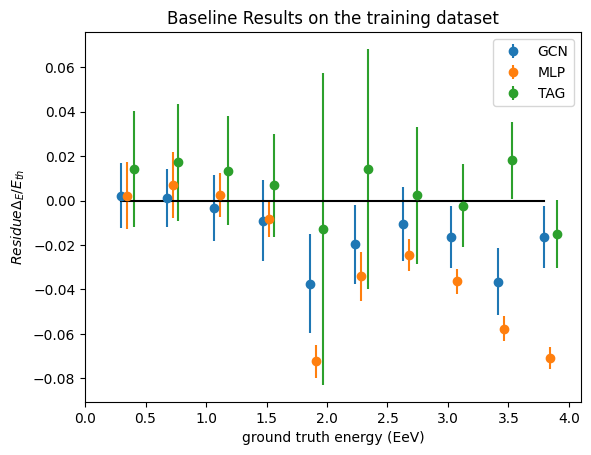

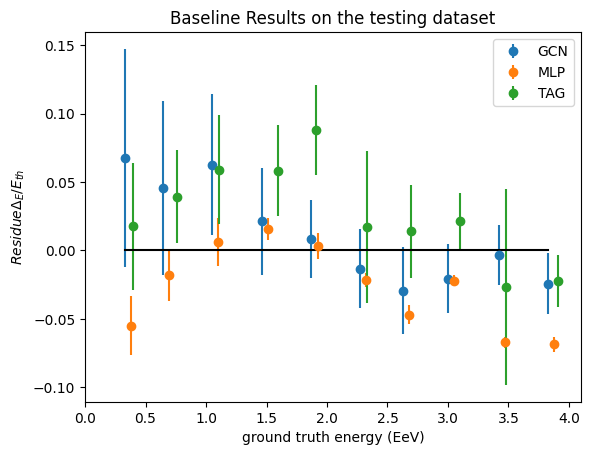

In [7]:
plot_base_perf(folder_names, labels, suffix=suffix, title=title)

# Plot training at 80% of the antennas

In [8]:
offset, algo, name, lst_pourcent = 0, "gcn", "part_poscor", [0, 10, 20, 30,  40]
exp_name = f"{algo}_{name}"
exps_to_load = [f"{exp_name}_all/infill_{distrib}_coarse_{distrib}" for distrib in lst_pourcent]
labels = [f"antenna added: {20-distrib}%" for distrib in lst_pourcent[:3]] + [f"antenna removed: {distrib-20}%" for distrib in lst_pourcent[3:]]
title = f"Comparison of performance when adding or removing antennas with the GCN"

In [11]:
offset, algo, name, lst_pourcent = 0, "mlp", "part_poscor", [0, 10, 20, 30, 40]
exp_name = f"{algo}_{name}"
exps_to_load = [f"{exp_name}_all/infill_{distrib}_coarse_{distrib}" for distrib in lst_pourcent]
labels = [f"antenna added: {20-distrib}%" for distrib in lst_pourcent[:3]] + [f"antenna removed: {distrib-20}%" for distrib in lst_pourcent[3:]]
title = f"Comparison of performance when adding or removing antennas with the MLP"

In [9]:
offset, algo, name, lst_pourcent = 0, "gcn", "part", [0, 10, 20, 30,  40]
exp_name = f"{algo}_{name}"
exps_to_load = [f"{exp_name}_all/infill_{distrib}_coarse_{distrib}" for distrib in lst_pourcent]
labels = [f"antenna added: {20-distrib}%" for distrib in lst_pourcent[:3]] + [f"antenna removed: {distrib-20}%" for distrib in lst_pourcent[3:]]
title = f"Comparison of performance when adding or removing antennas with the GCN"

In [12]:
offset, algo, name, lst_pourcent = 0, "mlp", "part", [0, 10, 20, 30,  40]
exp_name = f"{algo}_{name}"
exps_to_load = [f"{exp_name}_all/infill_{distrib}_coarse_{distrib}" for distrib in lst_pourcent]
labels = [f"antenna added: {20-distrib}%" for distrib in lst_pourcent[:3]] + [f"antenna removed: {distrib-20}%" for distrib in lst_pourcent[3:]]
title = f"Comparison of performance when adding or removing antennas with the MLP"

In [8]:
offset, algo, name, lst_pourcent = 0, "tag", "part_pos", [0, 10, 20, 30,  40]
exp_name = f"{algo}_{name}"
exps_to_load = [f"{exp_name}_all/infill_{distrib}_coarse_{distrib}" for distrib in lst_pourcent]
labels = [f"antenna added: {20-distrib}%" for distrib in lst_pourcent[:3]] + [f"antenna removed: {distrib-20}%" for distrib in lst_pourcent[3:]]
title = f"Comparison of performance when adding or removing antennas with the TAG"

# Infill

In [15]:
offset, algo, name, lst_pourcent = 0, "gcn", "part", [0, 10, 20, 30,  40]
exp_name = f"{algo}_{name}"
exps_to_load = [f"{exp_name}_all/infill_{distrib_infill}_coarse_{20}" for distrib_infill in lst_pourcent]
labels = [f"antenna infill added: {20-distrib}%" for distrib in lst_pourcent[:3]] + [f"antenna infill removed: {distrib-20}%" for distrib in lst_pourcent[3:]]
title = f"Comparison of performance when adding or removing antennas with the GCN"

In [18]:
offset, algo, name, lst_pourcent = 0, "mlp", "part", [0, 10, 20, 30,  40]
exp_name = f"{algo}_{name}"
exps_to_load = [f"{exp_name}_all/infill_{distrib_infill}_coarse_{20}" for distrib_infill in lst_pourcent]
labels = [f"antenna infill added: {20-distrib}%" for distrib in lst_pourcent[:3]] + [f"antenna infill removed: {distrib-20}%" for distrib in lst_pourcent[3:]]
title = f"Comparison of performance when adding or removing antennas with the MLP"

# Coarse

In [24]:
offset, algo, name, lst_pourcent = 0, "gcn", "part", [0, 10, 20, 30,  40]
exp_name = f"{algo}_{name}"
exps_to_load = [f"{exp_name}_all/infill_{20}_coarse_{distrib_coarse}" for distrib_coarse in lst_pourcent]
labels = [f"antenna coarse added: {20-distrib}%" for distrib in lst_pourcent[:3]] + [f"antenna coarse removed: {distrib-20}%" for distrib in lst_pourcent[3:]]
title = f"Comparison of performance when adding or removing antennas with the GCN"

In [27]:
offset, algo, name, lst_pourcent = 0, "mlp", "part", [0, 10, 20, 30,  40]
exp_name = f"{algo}_{name}"
exps_to_load = [f"{exp_name}_all/infill_{20}_coarse_{distrib_coarse}" for distrib_coarse in lst_pourcent]
labels = [f"antenna coarse added: {20-distrib}%" for distrib in lst_pourcent[:3]] + [f"antenna coarse removed: {distrib-20}%" for distrib in lst_pourcent[3:]]
title = f"Comparison of performance when adding or removing antennas with the MLP"

# Plots

In [9]:
def plot_all_diff(exps_to_load:List[str], labels:List[str], title:str="Comparison between number of coarse antennas used"):
    cm = plt.get_cmap("plasma")
    fig = plt.figure()
    ax1 = fig.add_subplot(111)
    ax1.set_prop_cycle('color', [cm(1.*i/(len(exps_to_load))) for i in range(len(exps_to_load))])
    pred_train_mean_lst = []
    pred_train_std_lst = []
    true_train_mean_lst = []

    pred_test_mean_lst = []
    pred_test_std_lst = []
    true_test_mean_lst = []
    for exp in exps_to_load:
        fig_dir_path = "./Figures/" + exp + "/"

        pred_train_mean_lst.append(np.load(fig_dir_path + "train_pred.npy"))
        pred_train_std_lst.append(np.load(fig_dir_path + "train_std.npy") )
        true_train_mean_lst.append(np.load(fig_dir_path + "train_true.npy"))

        pred_test_mean_lst.append(np.load(fig_dir_path + "test_pred.npy"))
        pred_test_std_lst.append(np.load(fig_dir_path + "test_std.npy"))
        true_test_mean_lst.append(np.load(fig_dir_path + "test_true.npy"))
    i = 0
    j = i+1
    for i in range(len(exps_to_load)):
        plt.errorbar(true_test_mean_lst[i] + 0.04*i, pred_test_mean_lst[i]/true_test_mean_lst[i], yerr=pred_test_std_lst[i]/true_test_mean_lst[i], fmt="o", label=labels[i])

    plt.plot(true_test_mean_lst[0], [0 for _ in range(len(true_test_mean_lst[0]))], "k")
    plt.title(title)
    plt.xlabel("ground truth energy (EeV)")
    plt.ylabel("$Residue \Delta_{E}/E_{th} $")
    plt.xlim(0, 4.1)
    plt.legend()


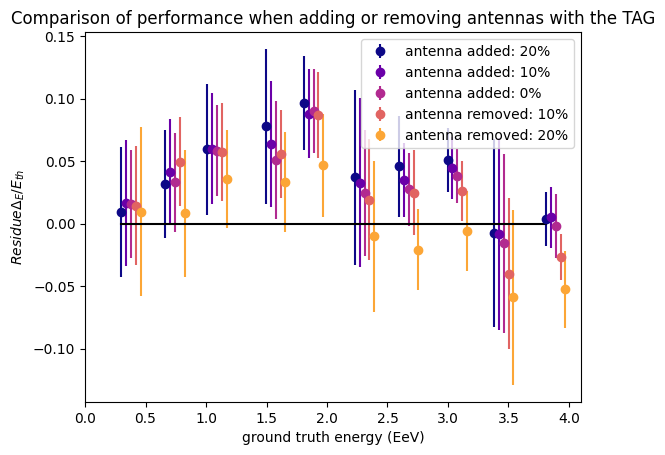

In [10]:
plot_all_diff(exps_to_load, labels, title)

# Test with more or less infill

# Load the 10 datasets answer from a model to compare the accuracy (Outdated)

In [ ]:
offset, algo, name = 2, "gatedGCN", "ohdeg_max"
exp_name = f"{algo}_{name}"
exps_to_load_infill = [f"{exp_name}{i/10}" for i in range(0+offset, 11, 2)]
labels_infill = [f"test_infill:{i*10}%" for i in range(0+offset, 11, 2)]
title_infill = f"Comparison between number of infill antennas used at testing \nalgo: {algo} (train:100%, test_coarse:100%)"
exps_to_load_coarse = [f"{exp_name}{i/10}" for i in range(20-offset, 9, -2)]
labels_coarse = [f"test_coarse:{(10-i)*10}%" for i in range(10-offset, -1, -2)]
title_coarse = f"Comparison between number of coarse antennas used at testing \n algo: {algo} (train:100%, test_infill:100%)"

In [ ]:
def plot_diff(exps_to_load:List[str], labels:List[str], title:str="Comparison between number of coarse antennas used"):
    if len(exps_to_load) > 1:
        colors = [(0.4 + i*(1-0.4)/(len(exps_to_load)-1), 0., 0.) for i in range(len(exps_to_load))]
    else:
        colors = [(1, 0, 0)]
    plt.figure()
    pred_train_mean_lst = []
    pred_train_std_lst = []
    true_train_mean_lst = []

    pred_test_mean_lst = []
    pred_test_std_lst = []
    true_test_mean_lst = []
    for exp in exps_to_load:
        fig_dir_path = "./Figures/" + exp + "/"

        pred_train_mean_lst.append(np.load(fig_dir_path + "train_pred.npy"))
        pred_train_std_lst.append(np.load(fig_dir_path + "train_std.npy") )
        true_train_mean_lst.append(np.load(fig_dir_path + "train_true.npy"))

        pred_test_mean_lst.append(np.load(fig_dir_path + "test_pred.npy"))
        pred_test_std_lst.append(np.load(fig_dir_path + "test_std.npy"))
        true_test_mean_lst.append(np.load(fig_dir_path + "test_true.npy"))
    i = 0
    j = i+1
    for i in range(len(exps_to_load)):
        plt.errorbar(true_test_mean_lst[i] + 0.05*i, pred_test_mean_lst[i]/true_test_mean_lst[i], yerr=pred_test_std_lst[i]/true_test_mean_lst[i], fmt="o", label=labels[i], color=colors[i])

    plt.plot(true_test_mean_lst[0], [0 for _ in range(len(true_test_mean_lst[0]))], "k")
    plt.title(title)
    plt.xlabel("ground truth energy (EeV)")
    plt.ylabel("$Residue \Delta_{E}/E_{th} $")
    plt.xlim(0, 4.1)
    plt.legend()


In [ ]:
plot_diff(exps_to_load_infill, labels_infill, title=title_infill), plot_diff(exps_to_load_coarse, labels_coarse, title=title_coarse)